In [1]:
# Import important library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(11,9)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Verify current working directory
import os 
print(os.getcwd()) 

C:\Users\Venkatesh K Govindan\PGP-AIML\Lab\Residency-4\External Lab


### Q1 Read the input file and check the data dimension

##### * Read input file and understand the data, "default" is my dependent variable

In [3]:
credit_df = pd.read_csv('german_credit.csv')
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
credit_df.shape

(1000, 21)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [6]:
credit_df_copy = credit_df.copy()

In [7]:
credit_df_copy.apply(lambda x : sum(x.isna()))

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

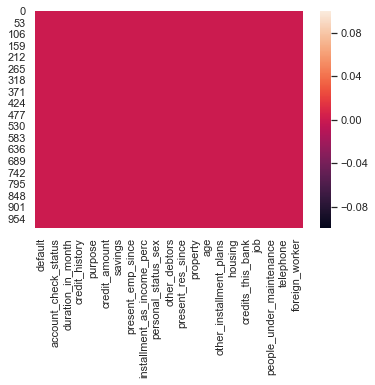

In [8]:
sns.heatmap(credit_df_copy.isna())

##### * Observe no NAN values in the dataset

0    700
1    300
Name: default, dtype: int64


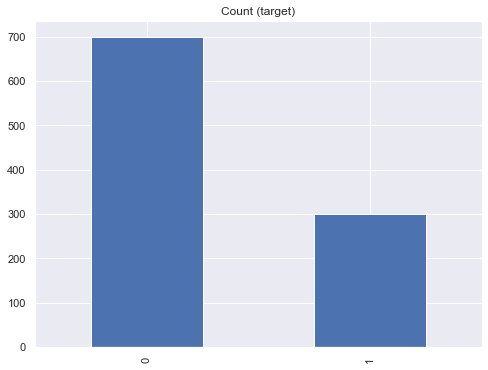

In [9]:
print(credit_df_copy['default'].value_counts())
sns.set(rc={'figure.figsize':(8,6)})
credit_df_copy['default'].value_counts().plot(kind='bar', title='Count (target)')

##### * Observe that target variable distribution is 70:30, null accuracy for this is around 70%

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
print(credit_df_copy.shape)
credit_df_copy.head()

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [11]:
credit_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [12]:
credit_df_dummy = pd.get_dummies(credit_df_copy, drop_first=True)

In [13]:
credit_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

In [14]:
print(credit_df_dummy.shape)
credit_df_dummy.head()

(1000, 49)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [15]:
credit_df_dummy.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.258333,-0.044009,...,0.125750,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-0.021822,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392


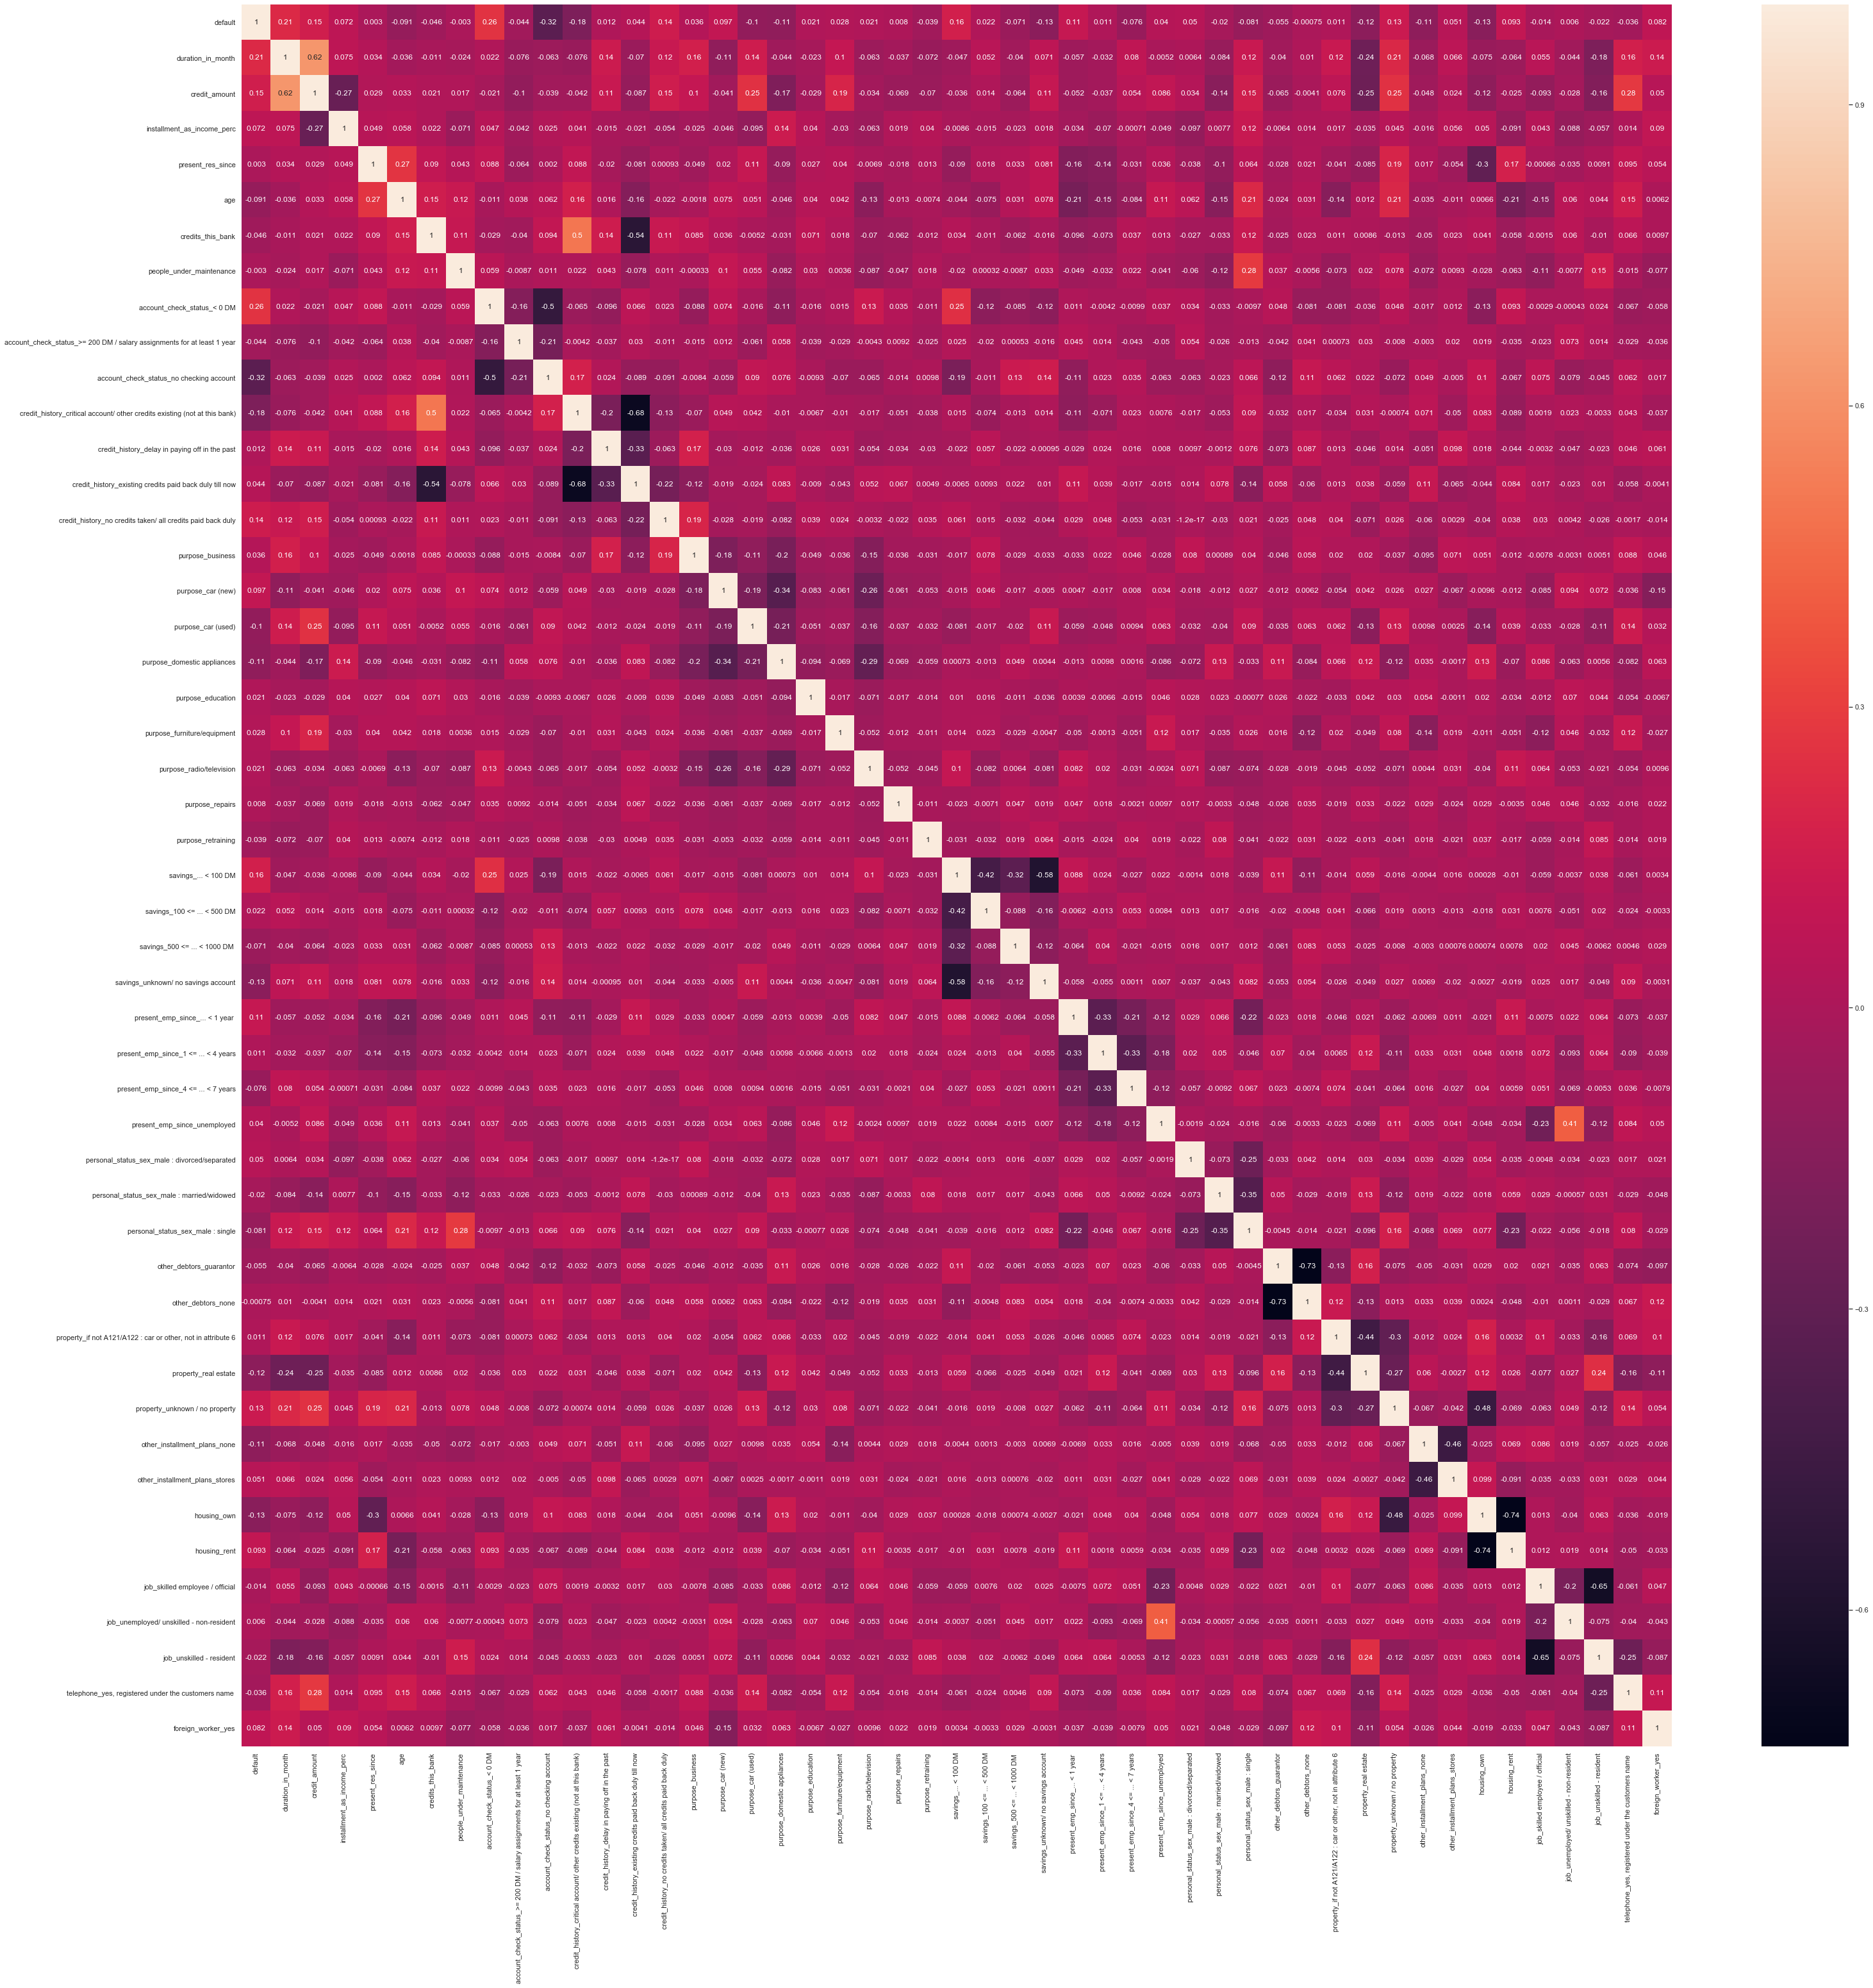

In [16]:
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(50,50)})
sns.heatmap(credit_df_dummy.corr(),annot=True)

#### * Observe; high correlation between few dummy variables, but not with original variables

#### * Few highly correlated variables are 
##### *** "other_debtors_guarantor"/"other_debtors_none" ---> -.73
##### *** "housing_own"/"housing_rent" ---> -.74

### Drop the original variables which are converted to dummy

In [17]:
print('Frequency count for account_check_status\n',credit_df_copy['account_check_status'].value_counts())
print('\nSum of frquency count: ',credit_df_copy['account_check_status'].value_counts().sum())

Frequency count for account_check_status
 no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

Sum of frquency count:  1000


#### * observe 4 unique values for account_check_status column

In [18]:
print('Frequency count for purpose\n',credit_df_copy['purpose'].value_counts())
print('\nSum of frquency count: ',credit_df_copy['purpose'].value_counts().sum())

Frequency count for purpose
 domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
furniture/equipment              12
repairs                          12
retraining                        9
Name: purpose, dtype: int64

Sum of frquency count:  1000


#### * observe 10 unique values for purpose column

In [19]:
credit_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

#### * Observe that the original variables of object type were converted to dummies and for n unique values in original variables, n-1 dummies were created and those dummy columns replaces original column.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [20]:
credit_df_dummy.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


In [21]:
X=credit_df_dummy.copy()
y=X.pop('default')

In [22]:
print(X.shape,'\n',y.shape)

(1000, 48) 
 (1000,)


In [23]:
feature_name = X.columns
print(feature_name)

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings account',
       '

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [26]:
print(X_train.shape)
print(y_train.shape)

(700, 48)
(700,)


In [27]:
print(X_test.shape)
print(y_test.shape)

(300, 48)
(300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_rfc = RandomForestClassifier(n_jobs=2, n_estimators = 500, criterion='entropy', random_state=9999).fit(X_train, y_train)

In [30]:
print('Model training score ->', model_rfc.score(X_train, y_train))
print('Model testing score ->', model_rfc.score(X_test, y_test))

Model training score -> 1.0
Model testing score -> 0.7566666666666667


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [31]:
prediction_rfc = model_rfc.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
print(metrics.confusion_matrix(y_test, prediction_rfc))

[[199  15]
 [ 58  28]]


In [34]:
print(metrics.classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       214
           1       0.65      0.33      0.43        86

    accuracy                           0.76       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.74      0.76      0.73       300



In [35]:
print(metrics.accuracy_score(y_test, prediction_rfc))

0.7566666666666667


In [36]:
print(metrics.f1_score(y_test, prediction_rfc))

0.434108527131783


##### Test accuracy is around 75.67%

### Q6 Show the list of the features importance( 1 Marks)

In [37]:
print(pd.DataFrame(model_rfc.feature_importances_, columns = ["Imp"], index = feature_name))

                                                         Imp
duration_in_month                                   0.086042
credit_amount                                       0.116350
installment_as_income_perc                          0.043242
present_res_since                                   0.038028
age                                                 0.090328
credits_this_bank                                   0.021543
people_under_maintenance                            0.012796
account_check_status_< 0 DM                         0.033826
account_check_status_>= 200 DM / salary assignm...  0.009340
account_check_status_no checking account            0.049934
credit_history_critical account/ other credits ...  0.031238
credit_history_delay in paying off in the past      0.010789
credit_history_existing credits paid back duly ...  0.017321
credit_history_no credits taken/ all credits pa...  0.012845
purpose_business                                    0.012067
purpose_car (new)       

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [38]:
from sklearn.model_selection import KFold

In [39]:
num_folds = 10
seed = 77

In [40]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

In [41]:
kfold.get_n_splits(X_train)

10

In [42]:
for train_index, test_index in kfold.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  66  67  68  69  70  71  73  74  75  76  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 101 102 103 105 106 107 108 109 110 111 113 114 115 116 117 118
 119 121 122 124 126 127 128 129 130 131 132 133 134 135 137 138 139 140
 142 143 144 145 146 147 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 165 166 167 168 169 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 205 206 207 208 209 210 211 212 213 214 215 216 218 219 221
 222 223 224 225 226 227 228 229 231 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 248 249 250 251 252 253 254 256 257 258 260 261 262
 263 264 265 266 267 268 269 270 272 274 275

##### Validate the Random Forest model build above using k fold

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
results = []
scoring = ['accuracy', 'f1']
for score in scoring:
    cv_results = cross_val_score(model_rfc, X_train, y_train, cv=kfold, scoring=score)
    print(score, ":", cv_results)
    results.append(cv_results)

accuracy : [0.77142857 0.72857143 0.7        0.77142857 0.78571429 0.74285714
 0.78571429 0.67142857 0.8        0.75714286]
f1 : [0.52941176 0.45714286 0.51162791 0.46666667 0.4        0.4
 0.48275862 0.25806452 0.61111111 0.51428571]


##### Calculate Mean score

In [45]:
print("Mean accuracy score for Random Forest model using KFold is :", results[0].mean())

Mean accuracy score for Random Forest model using KFold is : 0.7514285714285714


In [46]:
print("Mean f1 score for Random Forest model using KFold is :", results[1].mean())

Mean f1 score for Random Forest model using KFold is : 0.4631069157707663


##### Calculate score standard deviation using std()

In [47]:
print("Standard deviation of accuracy score for Random Forest model using KFold is :", results[0].std())

Standard deviation of accuracy score for Random Forest model using KFold is : 0.03896623341995961


In [48]:
print("Standard deviation of f1 score for Random Forest model using KFold is :", results[1].std())

Standard deviation of f1 score for Random Forest model using KFold is : 0.09039740784486609


##### Observe that models performance is consistant across all the folds, we can generalize this model for unknown dataset prediction.

# Q8 Print the confusion matrix( 1 Marks)

In [49]:
prediction_rfc = model_rfc.predict(X_test)

In [50]:
conf_matrics = metrics.confusion_matrix(y_test, prediction_rfc)
conf_matrics

array([[199,  15],
       [ 58,  28]], dtype=int64)

Text(0.5, 30.5, 'Predicted Label')

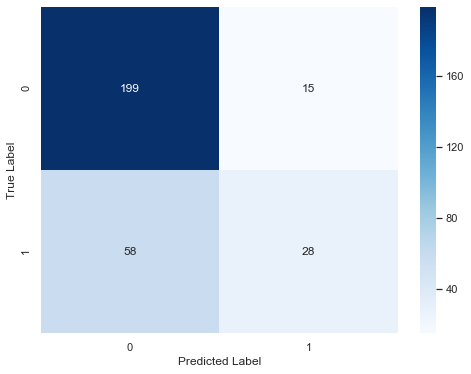

In [51]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(conf_matrics, cmap = 'Blues', annot=True, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [52]:
print(metrics.classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       214
           1       0.65      0.33      0.43        86

    accuracy                           0.76       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.74      0.76      0.73       300



##### Percentage of correct predictions for Random Forest model for this usecase (TP+TN/TP+TN+FP+FN))

In [53]:
metrics.accuracy_score(y_test, prediction_rfc)

0.7566666666666667

In [54]:
((conf_matrics[0,0]+conf_matrics[1,1])/(conf_matrics[0,0]+conf_matrics[0,1]+conf_matrics[1,0]+conf_matrics[1,1]))

0.7566666666666667

##### Sensitivity or True Positive Rate or Recall for Random Forest model for this usecase (TP/TP+FN)

In [55]:
metrics.recall_score(y_test, prediction_rfc)

0.32558139534883723

In [56]:
(conf_matrics[1,1]/(conf_matrics[1,0]+conf_matrics[1,1]))

0.32558139534883723

##### Precision for Random Forest model for this usecase (TP/TP+FP)

In [57]:
metrics.precision_score(y_test, prediction_rfc)

0.6511627906976745

In [58]:
(conf_matrics[1,1]/(conf_matrics[1,1]+conf_matrics[0,1]))

0.6511627906976745

[link text](https://) ### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [59]:
bootstrap_iteration = 10
accuracy = []
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model_rfc.fit(X_, y_)
    y_pred = model_rfc.predict(X_test)    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [60]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7483333333333333
Standard deviation:  0.01790406533599437
